C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


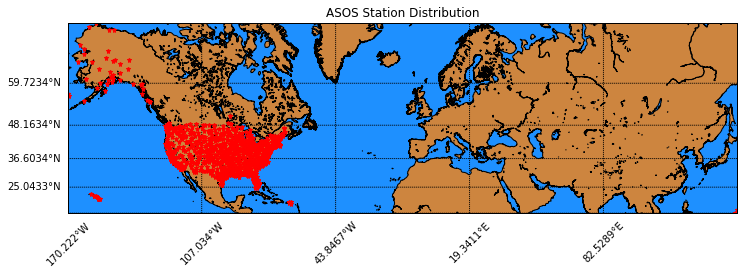

In [1]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

lats, lons,names,altitude = [],[],[],[]

# the asos_stations file can be found here: 
# https://engineersportal.com/s/asos_stations.csv
with open('asos_stations.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append(data['CALL'])
        lats.append(float(data['LAT']))
        lons.append(float(data['LON']))
        altitude.append(float(data['ELEV']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("ASOS Station Distribution")
plt.savefig('asos_station_plot.png', format='png', dpi=500)
plt.show()

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


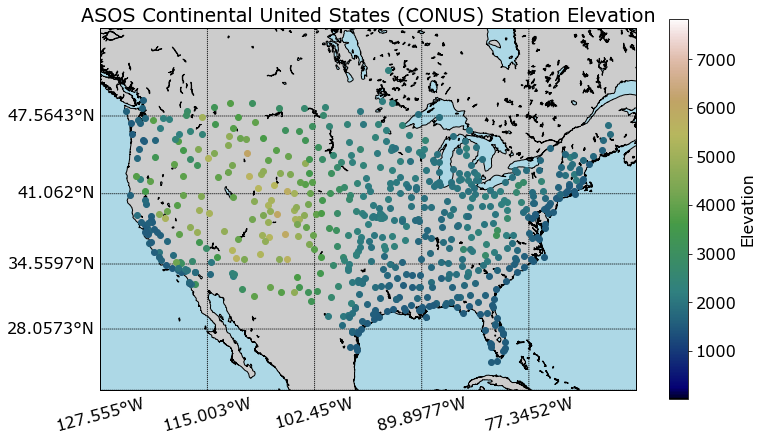

In [2]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv

# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 16}
matplotlib.rc('font', **font)

# Grabbing the .csv data
lats,lons,names,altitude = [],[],[],[]
temp_dat = []
with open('asos_stations.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        if float(data['UTC'])>-5. or float(data['UTC'])<-8. or float(data['ELEV'])<0.0:
            continue
        names.append('K'+data['CALL'])
        lats.append(float(data['LAT']))
        lons.append(float(data['LON']))
        altitude.append(float(data['ELEV']))
        
# How much to zoom from coordinates (in degrees)
zoom_scale = 3

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(12,7))
plt.title("ASOS Continental United States (CONUS) Station Elevation")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='#CCCCCC',lake_color='lightblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=15)
m.drawmapboundary(fill_color='lightblue')

# format colors for elevation range
alt_min = np.min(altitude)
alt_max = np.max(altitude)
cmap = plt.get_cmap('gist_earth')
normalize = matplotlib.colors.Normalize(vmin=alt_min, vmax=alt_max)

# plot elevations with different colors using the numpy interpolation mapping tool
# the range [50,200] can be changed to create different colors and ranges
for ii in range(0,len(altitude)):
    x,y = m(lons[ii],lats[ii])
    color_interp = np.interp(altitude[ii],[alt_min,alt_max],[50,200])
    plt.plot(x,y,marker='o',markersize=6,color=cmap(int(color_interp)))

# format the colorbar 
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,norm=normalize,label='Elevation')

# save the figure and show it
plt.savefig('asos_station_elevation.png', format='png', dpi=500,transparent=True)
plt.show()

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


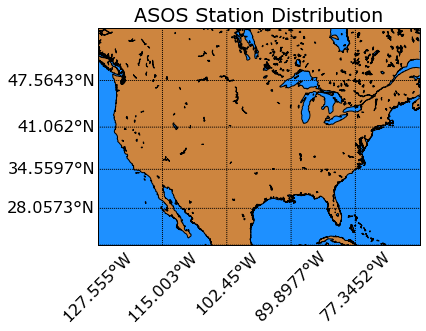

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

import pandas as pd

data = pd.read_json("headline_cities_and_countries.json")
data = data.replace({None: np.nan})

data.head(100)



lats, lons,names,altitude = [],[],[],[]

# the asos_stations file can be found here: 
# https://engineersportal.com/s/asos_stations.csv
with open('headline_cities_and_countries.json') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append(data['CALL'])
        lats.append(float(data['LAT']))
        lons.append(float(data['LON']))
        altitude.append(float(data['ELEV']))
        

# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("ASOS Station Distribution")
plt.savefig('asos_station_plot.png', format='png', dpi=500)
plt.show()

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


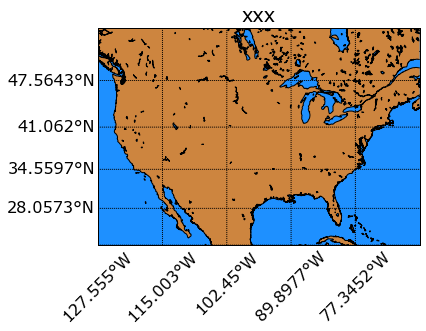

In [8]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

lats, lons,names,altitude = [],[],[],[]

# the headline file can be found here: 
with open('headline_cities_and_countries.json') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append(data['CALL'])
        lats.append(float(data['LAT']))
        lons.append(float(data['LON']))
        altitude.append(float(data['ELEV']))


# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("xxx")
plt.savefig('asos_station_plot.png', format='png', dpi=500)
plt.show()